# Solución de ecuaciones de una variable

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/master/1.0_Solucion_ecuaciones_de_una_variable.ipynb)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def graficar(f, x_i, x_f, num=1000):
    plt.style.use('seaborn')
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

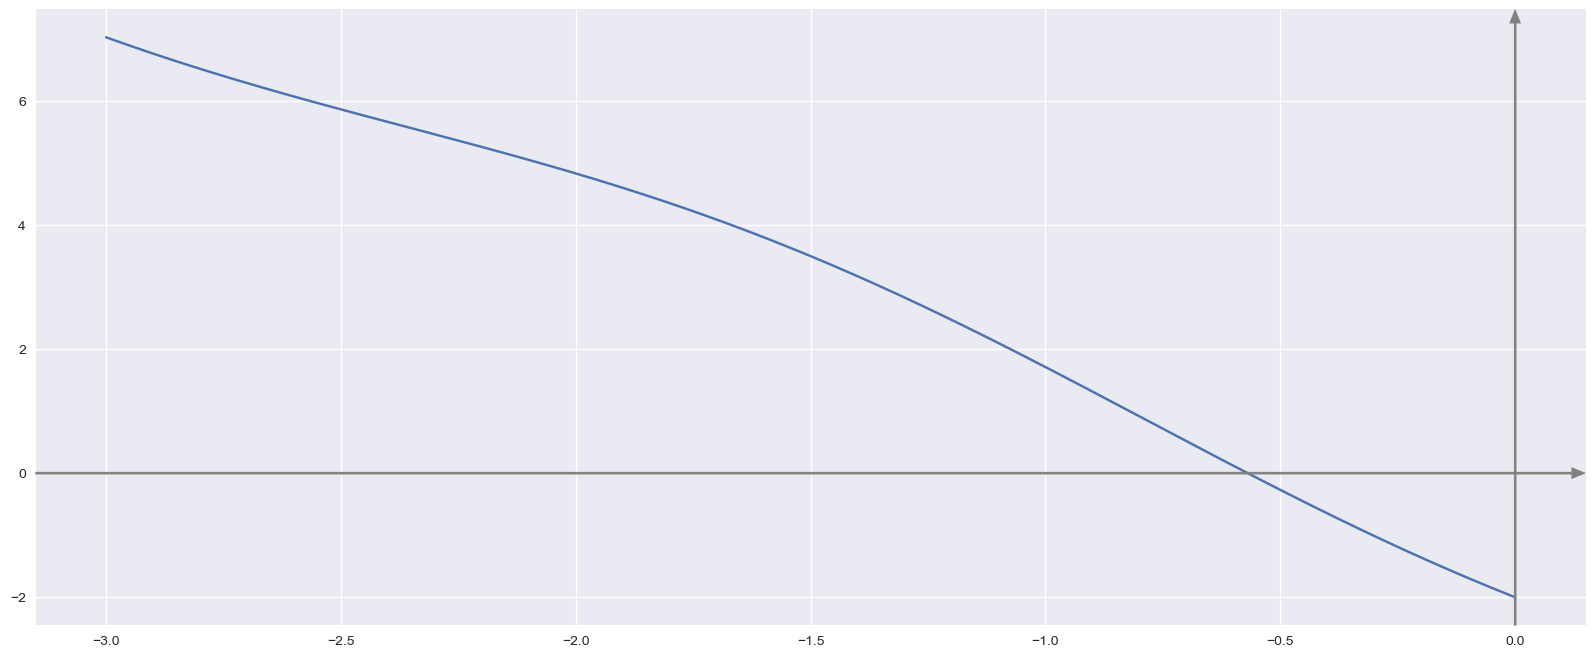

In [5]:
f = lambda x: (np.sin(x))**2 - 3*x - 2
graficar(f, -3, 0)

# Método de Bisección

In [18]:
def metodo_biseccion(f, a, b, tol=1e-4, num=100):
    if (f(a)*f(b)>=0):
        print('El método no funcioa, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if f(p_i) == 0:
            print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            print(f'Solución aproximada encontrada: {p_i}')
            print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None


In [9]:
f = lambda x: (np.sin(x))**2 - 3*x - 2

In [19]:
metodo_biseccion(f, -3, 0)

Solución aproximada encontrada: -0.5696868896484375
número de iteraciones: 16


-0.5696868896484375